In [1]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.python.keras.models import Sequential

import pandas as pd

# To plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

2.1.0


In [2]:
#Load the data, the dataset is already split into test and training datasets (no validation)
#Maybe worth considering re-splitting to obtain an avlidation set
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

https://github.com/zalandoresearch/fashion-mnist
above website gives the labels as 

Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [3]:
#Create an array of labels
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

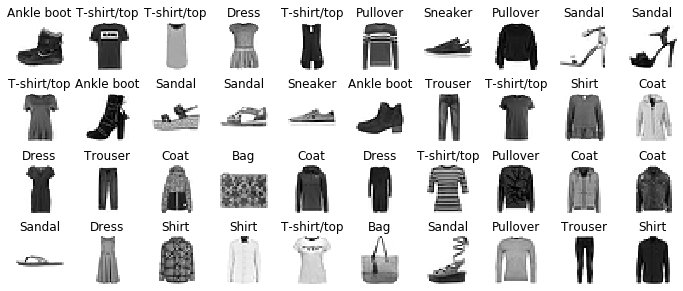

In [4]:
#Display a sample of the images in the training dataset
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(training_images[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[training_labels[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [5]:
print(training_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
#We reshape the columns from (784) to (28,28,1). 
training_images=training_images/255.0
test_images=test_images/255.0

training_images=training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [7]:
#Callback to stop if training reaches 95% ( this does not happen for 2nd Model)
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.95):
      print("\nReached 95% accuracy so cancelling training!")
      self.model.stop_training = True
        
callbacks = myCallback()

### 1st attempt without regularisation 
This Model reached 95% training accuracy but the test accuracy was only 91% , so
model was overfitting the training data

In [8]:
# 1st attempt without regularisation 
# This Model reached 95% training accuracy but the test accuracy was only 91% , so
# model was overfitting the training data

# model=tf.keras.models.Sequential()
# model.add(tf.keras.layers.Conv2D(128,kernel_size=(5,5),
#                   strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
# model.add(tf.keras.layers.MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
# model.add(tf.keras.layers.Conv2D(64,kernel_size=(2,2),
#                 strides=1,activation='relu',padding='same'))
# model.add(tf.keras.layers.MaxPool2D((2,2),2,padding='same'))
# model.add(tf.keras.layers.Conv2D(32,kernel_size=(2,2),
#                 strides=1,activation='relu',padding='same'))
# model.add(tf.keras.layers.MaxPool2D((2,2),2,padding='same'))          
# model.add(tf.keras.layers.Flatten())

# model.add(tf.keras.layers.Dense(units=512,activation='relu'))
# model.add(tf.keras.layers.Dropout(rate=0.2))
# model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

### 2nd attempt with regularisation 
In attempt to reduce overfitting, Droput layers have been added to the model.

This model reached 94% training accuracy with test accuracy of 92% , so
model was generalising better than 1st.

Maybe consider changing the droput rate, or even adding L2 regularisation

In [9]:
model=tf.keras.models.Sequential()
model.add(layers.Conv2D(128,kernel_size=(5,5),
                  strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(layers.MaxPool2D((2,2),2,padding='same'))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(layers.MaxPool2D((2,2),2,padding='same'))
model.add(layers.Dropout(rate=0.2))

model.add(layers.Flatten())
model.add(layers.Dense(units=512,activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(10, activation=tf.nn.softmax))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        32832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          8

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 232s 4ms/sample - loss: 0.5309 - accuracy: 0.8042
Epoch 2/50
60000/60000 [==============================] - 229s 4ms/sample - loss: 0.3547 - accuracy: 0.8697
Epoch 3/50
60000/60000 [==============================] - 231s 4ms/sample - loss: 0.3105 - accuracy: 0.8839
Epoch 4/50
60000/60000 [==============================] - 231s 4ms/sample - loss: 0.2873 - accuracy: 0.8938
Epoch 5/50
60000/60000 [==============================] - 239s 4ms/sample - loss: 0.2745 - accuracy: 0.8980
Epoch 6/50
60000/60000 [==============================] - 269s 4ms/sample - loss: 0.2579 - accuracy: 0.9025
Epoch 7/50
60000/60000 [==============================] - 245s 4ms/sample - loss: 0.2504 - accuracy: 0.9066
Epoch 8/50
60000/60000 [==============================] - 236s 4ms/sample - loss: 0.2458 - accuracy: 0.9083
Epoch 9/50
60000/60000 [==============================] - 261s 4ms/sample - loss: 0.2328 - accuracy: 0.9122
Epoch

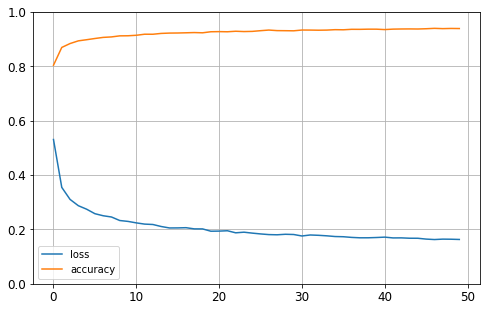

In [12]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 8s 815us/sample - loss: 0.2530 - accuracy: 0.9142


[0.2529662584453821, 0.9142]